In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [5]:
#Read the data
cars = pd.read_csv("E:/Big Data/Data Set/50_Startups.csv")
cars.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
#check for missing values
cars.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [19]:
cars.rename(columns = {'Marketing Spend':'M','R&D Spend':'RD'}, inplace = True)

In [20]:
cars

RD  Administration          M       State     Profit
0   165349.20       136897.80  471784.10    New York  192261.83
1   162597.70       151377.59  443898.53  California  191792.06
2   153441.51       101145.55  407934.54     Florida  191050.39
3   144372.41       118671.85  383199.62    New York  182901.99
4   142107.34        91391.77  366168.42     Florida  166187.94
5   131876.90        99814.71  362861.36    New York  156991.12
6   134615.46       147198.87  127716.82  California  156122.51
7   130298.13       145530.06  323876.68     Florida  155752.60
8   120542.52       148718.95  311613.29    New York  152211.77
9   123334.88       108679.17  304981.62  California  149759.96
10  101913.08       110594.11  229160.95     Florida  146121.95
11  100671.96        91790.61  249744.55  California  144259.40
12   93863.75       127320.38  249839.44     Florida  141585.52
13   91992.39       135495.07  252664.93  California  134307.35
14  119943.24       156547.42  256512.92     Florida  132602.65
15  114523.61       122616.84  261776.23    New York  129917.04
16   78013.11       121597.55  264346.06  California  126992.93
17   94657.16       145077.58  282574.31    New York  125370.37
18   91749.16       114175.79  294919.57     Florida  124266.90
19   86419.70       153514.11       0.00    New York  122776.86
20   76253.86       113867.30  298664.47  California  118474.03
21   78389.47       153773.43  299737.29    New York  111313.02
22   73994.56       122782.75  303319.26     Florida  110352.25
23   67532.53       105751.03  304768.73     Florida  108733.99
24   77044.01        99281.34  140574.81    New York  108552.04
25   64664.71       139553.16  137962.62  California  107404.34
26   75328.87       144135.98  134050.07     Florida  105733.54
27   72107.60       127864.55  353183.81    New York  105008.31
28   66051.52       182645.56  118148.20     Florida  103282.38
29   65605.48       153032.06  107138.38    New York  101004.64
30   61994.48       115641.28   91131.24     Florida   99937.59
31   61136.38       152701.92   88218.23    New York   97483.56
32   63408.86       129219.61   46085.25  California   97427.84
33   55493.95       103057.49  214634.81     Florida   96778.92
34   46426.07       157693.92  210797.67  California   96712.80
35   46014.02        85047.44  205517.64    New York   96479.51
36   28663.76       127056.21  201126.82     Florida   90708.19
37   44069.95        51283.14  197029.42  California   89949.14
38   20229.59        65947.93  185265.10    New York   81229.06
39   38558.51        82982.09  174999.30  California   81005.76
40   28754.33       118546.05  172795.67  California   78239.91
41   27892.92        84710.77  164470.71     Florida   77798.83
42   23640.93        96189.63  148001.11  California   71498.49
43   15505.73       127382.30   35534.17    New York   69758.98
44   22177.74       154806.14   28334.72  California   65200.33
45    1000.23       124153.04    1903.93    New York   64926.08
46    1315.46       115816.21  297114.46     Florida   49490.75
47       0.00       135426.92       0.00  California   42559.73
48     542.05        51743.15       0.00    New York   35673.41
49       0.00       116983.80   45173.06  California   14681.40

In [9]:
cars.corr()

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

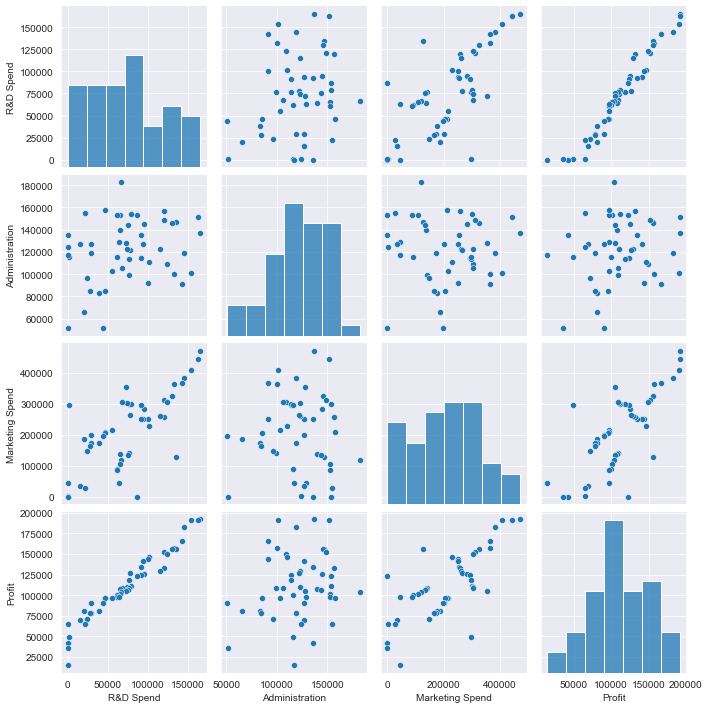

In [10]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [14]:
ml_v=smf.ols('Profit~Administration',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [15]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 18 Jul 2021   Prob (F-statistic):              0.162
Time:                        12:53:29   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
ml_v=smf.ols('Profit~M',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    7.808356
M            7.802657
dtype: float64 
 Intercept    4.294735e-10
M            4.381073e-10
dtype: float64


In [22]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           4.38e-10
Time:                        12:55:56   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
M              0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
ml_v=smf.ols('Profit~RD',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [24]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           3.50e-32
Time:                        12:56:16   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Multiple Reg 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [25]:
#Read the data
Toyota = pd.read_csv("E:/Big Data/Data Set/ToyotaCorolla.csv")
Toyota.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  �TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [26]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [27]:
#check for missing values
Toyota.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [28]:
Toyota.corr()

Id     Price  Age_08_04  Mfg_Month  Mfg_Year  \
Id                1.000000 -0.738250   0.906132   0.043742 -0.919523   
Price            -0.738250  1.000000  -0.876590  -0.018138  0.885159   
Age_08_04         0.906132 -0.876590   1.000000  -0.123255 -0.983661   
Mfg_Month         0.043742 -0.018138  -0.123255   1.000000 -0.057416   
Mfg_Year         -0.919523  0.885159  -0.983661  -0.057416  1.000000   
KM                0.273298 -0.569960   0.505672  -0.020630 -0.504974   
HP               -0.109375  0.314990  -0.156622  -0.039312  0.164697   
Met_Color        -0.079713  0.108905  -0.108150   0.030266  0.103310   
Automatic         0.066265  0.033081   0.031717   0.009146 -0.033567   
cc               -0.117704  0.126389  -0.098084   0.037387  0.091892   
Doors            -0.130207  0.185326  -0.148359  -0.012069  0.151442   
Cylinders              NaN       NaN        NaN        NaN       NaN   
Gears            -0.043343  0.063104  -0.005364  -0.013063  0.007766   
Quarterly_Tax    -0.240821  0.219197  -0.198431   0.031373  0.193934   
Weight           -0.414500  0.581198  -0.470253  -0.002167  0.473478   
Mfr_Guarantee    -0.162006  0.197802  -0.164658  -0.005771  0.166697   
BOVAG_Guarantee  -0.015065  0.028133   0.006865  -0.003863 -0.006206   
Guarantee_Period -0.086256  0.146627  -0.152563   0.029010  0.148218   
ABS              -0.461437  0.306138  -0.412887   0.072532  0.402215   
Airbag_1         -0.123465  0.093588  -0.105406   0.003756  0.105359   
Airbag_2         -0.358316  0.248974  -0.329017   0.076749  0.317075   
Airco            -0.386207  0.429259  -0.403600   0.057088  0.395674   
Automatic_airco  -0.327468  0.588262  -0.426259  -0.049017  0.437718   
Boardcomputer    -0.695207  0.601292  -0.719449   0.017715  0.720567   
CD_Player        -0.464520  0.481374  -0.510895  -0.016736  0.517008   
Central_Lock     -0.238940  0.343458  -0.279631   0.010055  0.279490   
Powered_Windows  -0.236723  0.356518  -0.283856   0.025185  0.280996   
Power_Steering   -0.091587  0.064275  -0.069192  -0.055495  0.079676   
Radio            -0.010971 -0.041887   0.013791   0.031601 -0.019607   
Mistlamps        -0.139708  0.222083  -0.126895  -0.033504  0.133737   
Sport_Model      -0.028704  0.164121  -0.110988   0.052789  0.102080   
Backseat_Divider -0.136398  0.102569  -0.116751   0.023245  0.113237   
Metallic_Rim     -0.022232  0.108564  -0.040045   0.023506  0.036022   
Radio_cassette   -0.011611 -0.043179   0.012857   0.032576 -0.018844   
Tow_Bar           0.159171 -0.172369   0.188720  -0.042170 -0.182206   

                        KM        HP  Met_Color  Automatic        cc  ...  \
Id                0.273298 -0.109375  -0.079713   0.066265 -0.117704  ...   
Price            -0.569960  0.314990   0.108905   0.033081  0.126389  ...   
Age_08_04         0.505672 -0.156622  -0.108150   0.031717 -0.098084  ...   
Mfg_Month        -0.020630 -0.039312   0.030266   0.009146  0.037387  ...   
Mfg_Year         -0.504974  0.164697   0.103310  -0.033567  0.091892  ...   
KM                1.000000 -0.333538  -0.080503  -0.081854  0.102683  ...   
HP               -0.333538  1.000000   0.058712   0.013144  0.035856  ...   
Met_Color        -0.080503  0.058712   1.000000  -0.019335  0.031812  ...   
Automatic        -0.081854  0.013144  -0.019335   1.000000  0.066740  ...   
cc                0.102683  0.035856   0.031812   0.066740  1.000000  ...   
Doors            -0.036197  0.092424   0.085243  -0.027654  0.079903  ...   
Cylinders              NaN       NaN        NaN        NaN       NaN  ...   
Gears             0.015023  0.209477   0.018601  -0.098555  0.014629  ...   
Quarterly_Tax     0.278165 -0.298432   0.011326  -0.055371  0.306996  ...   
Weight           -0.028598  0.089614   0.057929   0.057249  0.335637  ...   
Mfr_Guarantee    -0.212851  0.140026   0.154850   0.026194 -0.057407  ...   
BOVAG_Guarantee   0.001438  0.022701   0.010783   0.023393 -0.081725  ...   
Guarantee_Period -0.138942  0.076163   0.0092

In [43]:
Toyota.rename(columns = {'Age_08_04':'DD','Mfg_Month':'MM','Mfg_Year':'YY','Met_Color':'MetColor','Quarterly_Tax':'QuarterlyTax','CD_Player':'CDPlayer','Mfr_Guarantee':'MfrGuarantee','Central_Lock':'CentralLock','Power_Steering':'PowerSteering'}, inplace = True)

In [44]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   DD                1436 non-null   int64 
 4   MM                1436 non-null   int64 
 5   YY                1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   MetColor          1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  QuarterlyTax      1436 non-null   int64 
 17  Weight        

In [47]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~DD+MM+YY+HP+Automatic+cc+Doors+Cylinders+Gears+QuarterlyTax+Weight+MfrGuarantee+CDPlayer+CentralLock',data=Toyota).fit()

In [48]:
#Coefficients
model.params

Intercept        -0.011103
DD             -144.149206
MM             -110.178887
YY               -1.064785
HP               36.520004
Automatic       713.920247
cc               -0.192126
Doors           -27.955044
Cylinders        -0.044412
Gears           390.021876
QuarterlyTax     -0.531230
Weight           14.840881
MfrGuarantee    358.668804
CDPlayer        188.630643
CentralLock     322.094819
dtype: float64

In [49]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept      -19.978390
DD             -55.181748
MM              -9.897547
YY              -1.424045
HP              12.492703
Automatic        4.355120
cc              -2.055033
Doors           -0.671072
Cylinders      -19.978390
Gears            1.891516
QuarterlyTax    -0.398731
Weight          13.081800
MfrGuarantee     4.639455
CDPlayer         1.805456
CentralLock      3.995055
dtype: float64 
 Intercept       1.802829e-78
DD              0.000000e+00
MM              2.211346e-22
YY              1.546527e-01
HP              4.658414e-34
Automatic       1.425153e-05
cc              4.005798e-02
Doors           5.022834e-01
Cylinders       1.802829e-78
Gears           5.875845e-02
QuarterlyTax    6.901515e-01
Weight          5.203905e-37
MfrGuarantee    3.814495e-06
CDPlayer        7.121462e-02
CentralLock     6.798755e-05
dtype: float64


In [50]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8544392415365412, 0.8532117439247622)

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     696.1
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:20:50   Log-Likelihood:                -12423.
No. Observations:                1436   AIC:                         2.487e+04
Df Residuals:                    1423   BIC:                         2.494e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0111      0.001    -19.978      0.000      -0.012      -0.010
DD            -144.1492      2.612    -55.182      0.000    -149.274    -139.025
MM            -110.1789     11.132     -9.898      0.000    -132.016     -88.342
YY              -1.0648      0.748     -1.424      0.155      -2.532       0.402
HP              36.5200      2.923     12.493      0.000      30.786      42.254
Automatic      713.9202    163.927      4.355      0.000     392.356    1035.484
cc              -0.1921      0.093     -2.055      0.040      -0.376      -0.009
Doors          -27.9550     41.657     -0.671      0.502    -109.671      53.761
Cylinders       -0.0444      0.002    -19.978      0.000      -0.049      -0.040
Gears          390.0219    206.195      1.892      0.059     -14.458     794.502
QuarterlyTax    -0.5312      1.332     -0.399      0.690      -3.145       2.082
Weight          14.8409      1.134     13.082      0.000      12.615      17.066
MfrGuarantee   358.6688     77.308      4.639      0.000     207.018     510.319
CDPlayer       188.6306    104.478      1.805      0.071     -16.317     393.578
CentralLock    322.0948     80.623      3.995      0.000     163.941     480.248
==============================================================================
Omnibus:                      176.071   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1511.395
Skew:                          -0.213   Prob(JB):                         0.00
Kurtosis:                       8.008   Cond. No.                     3.28e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Toyota)